# Sentiment Analysis Movie Reviews
This project will analyze whether the reviews of a movie is positive and negative based using IMDB reviews.  The goal is to create a model that will analyze a text and will classify it a negative or positive.

## Import necessary dependencies and settings

In [38]:
import os
#import tensorflow as tf

#Using Matplot to draw the Wordcloud
import matplotlib.pyplot as plt

import pandas as pd
import re
import nltk
import string

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

#from tensorflow.python.keras import models
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras.layers import Dropout




## Loading the Data
There are 5 files:
1. Train Texts
2. Train Labels
3. Test Texts
4. Test Labels
5. Dev/Unsupervised

In [2]:
imdb_path = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/txtImdb'

# Load the dataset
train_texts = []
train_labels = []
test_texts = []
test_labels = []
for dset in ['train', 'test']:
    for cat in ['pos', 'neg']:
        dset_path = os.path.join(imdb_path, dset, cat)
        for fname in sorted(os.listdir(dset_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(dset_path, fname)) as f:
                    if dset == 'train': train_texts.append(f.read())
                    else: test_texts.append(f.read())
                label = 0 if cat == 'neg' else 1
                if dset == 'train': train_labels.append(label)
                else: test_labels.append(label)

# Converting to np.array
#train_texts = np.array(train_texts)
#train_labels = np.array(train_labels)
#test_texts = np.array(test_texts)
#test_labels = np.array(test_labels)



In [9]:
#Development

dev_imdb_path = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/txtImdb/train'

dev_texts = []
for fname in sorted(os.listdir(dev_imdb_path)):
    if fname.endswith('.txt'):
        with open(os.path.join(dev_imdb_path, fname)) as f:
            dev_texts.append(f.read())

# Converting to np.array
#dev_texts = np.array(dev_texts)


In [10]:
dict_new = {
    'text': train_texts,
    'label': train_labels
}


data_train = pd.DataFrame(dict_new)


dict_new = {
    'text': test_texts,
    'label': test_labels
}

data_test = pd.DataFrame(dict_new)


In [11]:
data_train.sample(10)

,text,label
953,Not to be confused with the Resse Witherspoon ...,1
3960,I had heard good things about this film and wa...,1
9063,"Richard Dreyfuss stars in ""Moon Over Parador,""...",1
5651,"Back in the forties, when movies touched on ma...",1
2081,Arguebly Al Pacino's best role. He plays Tony ...,1
7859,This is without a doubt the funniest of the Cu...,1
11432,I can honestly say I never expected this movie...,1
3502,Let's begin with that theme song sung by Chris...,1
14992,Blood Surf AKA Krocodylus is a fair film that ...,0
8582,"It's only 2 episodes into a 5 part drama, but ...",1


# 3. Data Cleaning and Data Exploration

Remove HTML characters
Remove all punctuation from words.
Remove all words that are known stop words.
Remove all words less than one character
Stemming:
    Reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language



In [12]:
# remove URL's from train and test
data_train['clean_text'] = data_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
data_test['clean_text'] = data_test['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [13]:
# remove whitespaces
data_train['clean_text'] = data_train['clean_text'].apply(lambda x:' '.join(x.split()))
data_test['clean_text'] = data_test['clean_text'].apply(lambda x: ' '.join(x.split()))

In [14]:
data_train.sample(10)

,text,label,clean_text
14362,This was talked about to death by the critics ...,0,This was talked about to death by the critics ...
13892,"Visually interesting, but falls flat in the or...",0,"Visually interesting, but falls flat in the or..."
20526,"I never wanted to see this film, then one day,...",0,"I never wanted to see this film, then one day,..."
11568,"Though I did not begin to read the ""Classics"" ...",1,"Though I did not begin to read the ""Classics"" ..."
11303,This movie is wonderful. What separates it fro...,1,This movie is wonderful. What separates it fro...
5248,This film is worth seeing alone for Jared Harr...,1,This film is worth seeing alone for Jared Harr...
1319,"I am a big fan of Stephen King's work, and thi...",1,"I am a big fan of Stephen King's work, and thi..."
6361,Joseph Brady and Clarence Doolittle are two sa...,1,Joseph Brady and Clarence Doolittle are two sa...
23892,"This movie really, i mean REALLY, sucks. Its g...",0,"This movie really, i mean REALLY, sucks. Its g..."
8617,Utterly brilliant. Powerful and evocative. The...,1,Utterly brilliant. Powerful and evocative. The...


## Feature Engineering

Create a feature for text review length and for the percentage of text that is punctuation

In [15]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data_train['len'] = data_train['text'].apply(lambda x: len(x) - x.count(" "))
data_train['punct%'] = data_train['text'].apply(lambda x: count_punct(x))

data_test['len'] = data_test['text'].apply(lambda x: len(x) - x.count(" "))
data_test['punct%'] = data_test['text'].apply(lambda x: count_punct(x))


In [16]:
data_train.sample(10)

,text,label,clean_text,len,punct%
7167,Rudy does it again with this hot off the stree...,1,Rudy does it again with this hot off the stree...,292,2.4
20740,"Like most people, i was drawn to buy this film...",0,"Like most people, i was drawn to buy this film...",2483,5.4
2682,Renny Harlin's first American film was one of ...,1,Renny Harlin's first American film was one of ...,421,5.0
13606,First of all.....<br /><br />What the hell? Wh...,0,First of all.....<br /><br />What the hell? Wh...,636,7.1
24233,OK - I ADORE this film...I will credit this mo...,0,OK - I ADORE this film...I will credit this mo...,630,5.1
2452,"After all, you do not go to an Orson Welles mo...",1,"After all, you do not go to an Orson Welles mo...",1355,3.4
24786,Some wonder why there weren't anymore Mrs. Mur...,0,Some wonder why there weren't anymore Mrs. Mur...,815,5.0
23605,Obvious attack on Microsoft made by people who...,0,Obvious attack on Microsoft made by people who...,965,6.4
10939,I enjoyed this film. I thought it was an excel...,1,I enjoyed this film. I thought it was an excel...,1426,6.0
3653,This film exceeded my expectations. I thought ...,1,This film exceeded my expectations. I thought ...,521,4.0


Evaluate the newly created features

In [17]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

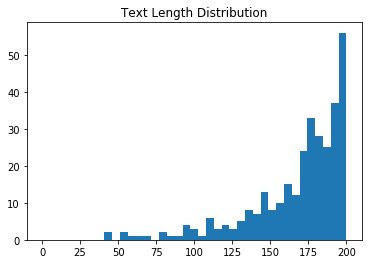

In [18]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data_train['len'], bins)
pyplot.title("Text Length Distribution")
pyplot.show()

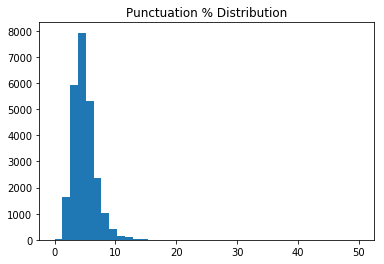

In [19]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data_train['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

## Let's take a quick look at the Words in the Reviews

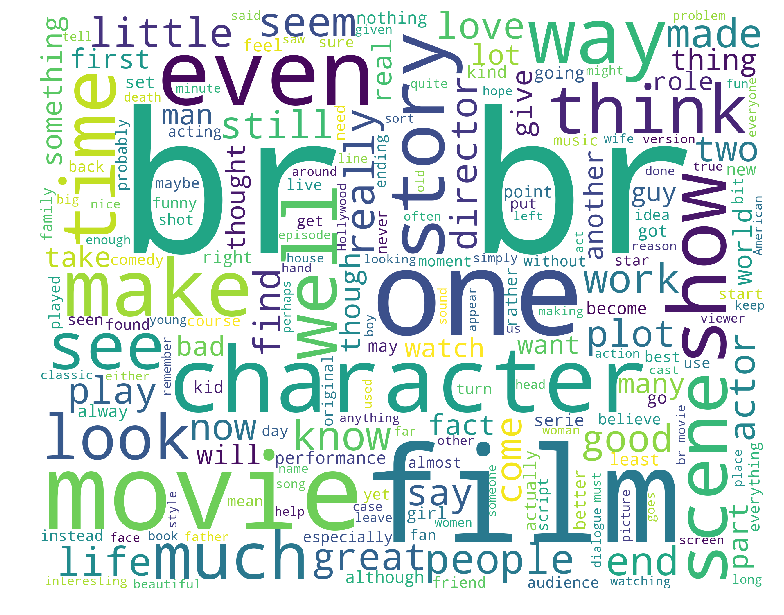

In [20]:
from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if not word.startswith(',')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
list_words = []

list_words = train_texts
    
wordcloud_draw(list_words,'white')


## Lematization
Let's takes into consideration the morphological analysis of the words

In [14]:
import spacy

# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [15]:
data_train['lemmat_text'] = lemmatization(data_train['clean_text'])
data_test['lemmat_text'] = lemmatization(data_test['clean_text'])


In [16]:
data_train.sample(10)

,text,label,clean_text,len,punct%,lemmat_text
8001,"This movie is humorous, charming, and easily b...",1,"This movie is humorous, charming, and easily b...",1001,5.9,"This movie be humorous , charming , and easily..."
13817,"I wanted to watch this movie, but one bizarre ...",0,"I wanted to watch this movie, but one bizarre ...",701,5.8,"-PRON- want to watch this movie , but one biza..."
2843,I Enjoyed Watching This Well Acted Movie Very ...,1,I Enjoyed Watching This Well Acted Movie Very ...,303,3.0,-PRON- enjoy watch This well Acted Movie very ...
17935,Unfortunately the movie is more concerned with...,0,Unfortunately the movie is more concerned with...,1076,3.3,unfortunately the movie be more concerned with...
2844,"On October of 1945, the American German descen...",1,"On October of 1945, the American German descen...",1519,3.8,"On October of 1945 , the american german desce..."
3429,Simply great movie no doubt about it. Great st...,1,Simply great movie no doubt about it. Great st...,725,2.5,simply great movie no doubt about -PRON- . gre...
4206,The thirties horror films that are best rememb...,1,The thirties horror films that are best rememb...,1740,2.6,the thirty horror film that be best remember b...
12289,According to the book The Last of the Cowboy H...,1,According to the book The Last of the Cowboy H...,1948,4.6,accord to the book the last of the Cowboy Hero...
6334,The premise of the story is simple: An old man...,1,The premise of the story is simple: An old man...,1233,4.7,the premise of the story be simple : an old ma...
24593,WOW! Pretty terrible stuff. The Richard Burton...,0,WOW! Pretty terrible stuff. The Richard Burton...,1263,4.8,wow ! pretty terrible stuff . the Richard Burt...


## Tokenizing the clean text

In [21]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data_train['text_tokenized'] = data_train['clean_text'].apply(lambda x: tokenize(x.lower()))
data_test['text_tokenized'] = data_test['clean_text'].apply(lambda x: tokenize(x.lower()))


## Removing Stop words

In [22]:
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [23]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data_train['text_nostop'] = data_train['text_tokenized'].apply(lambda x: remove_stopwords(x))
data_test['text_nostop'] = data_test['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [24]:
data_train.sample(10)

,text,label,clean_text,len,punct%,text_tokenized,text_nostop
15703,One of those el cheapo action adventures of th...,0,One of those el cheapo action adventures of th...,507,5.1,"[one, of, those, el, cheapo, action, adventure...","[one, el, cheapo, action, adventures, early, 1..."
848,It's a good movie maybe I like it because it w...,1,It's a good movie maybe I like it because it w...,209,2.4,"[it, s, a, good, movie, maybe, i, like, it, be...","[good, movie, maybe, like, filmed, pr, actors,..."
4720,Peter Bogdonavich has made a handful of truly ...,1,Peter Bogdonavich has made a handful of truly ...,602,3.5,"[peter, bogdonavich, has, made, a, handful, of...","[peter, bogdonavich, made, handful, truly, gre..."
1857,Excellent pirate entertainment! It has all the...,1,Excellent pirate entertainment! It has all the...,876,6.2,"[excellent, pirate, entertainment, it, has, al...","[excellent, pirate, entertainment, good, ingre..."
9276,"Hello everyone, This is my first time posting ...",1,"Hello everyone, This is my first time posting ...",436,4.6,"[hello, everyone, this, is, my, first, time, p...","[hello, everyone, first, time, posting, love, ..."
21759,"As many others have stated, this is a terrible...",0,"As many others have stated, this is a terrible...",787,7.8,"[as, many, others, have, stated, this, is, a, ...","[many, others, stated, terrible, movie, every,..."
16328,The Brain (or head) that Wouldn't Die is one o...,0,The Brain (or head) that Wouldn't Die is one o...,1527,4.5,"[the, brain, or, head, that, wouldn, t, die, i...","[brain, head, die, one, thoughtful, low, budge..."
20419,I wonder how the actors acted in this movie. A...,0,I wonder how the actors acted in this movie. A...,496,4.2,"[i, wonder, how, the, actors, acted, in, this,...","[wonder, actors, acted, movie, annette, bening..."
7399,"actually... that ""video camera"" effect, is jus...",1,"actually... that ""video camera"" effect, is jus...",612,5.4,"[actually, that, video, camera, effect, is, ju...","[actually, video, camera, effect, effect, rath..."
20846,"I agree with those reviews I have read here, a...",0,"I agree with those reviews I have read here, a...",920,3.0,"[i, agree, with, those, reviews, i, have, read...","[agree, reviews, read, words, define, turkey, ..."


## Evaluate Model Selection
**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [25]:
def clean_text(text):
#    text = "".join([word.lower() for word in text if word not in string.punctuation])
#    tokens = re.split('\W+', text)
#    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text


In [ ]:
## Vectorizing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [25]:


#TF-IDF
#tfidf_vect = TfidfVectorizer(analyzer=clean_text)
#tfidf_vect = TfidfVectorizer(lowercase=False)
tfidf_vect = TfidfVectorizer(tokenizer=clean_text, stop_words='english', lowercase=False)

X_tfidf = tfidf_vect.fit_transform(data_train['text_nostop'])
X_tfidf_feat = pd.concat([data_train['len'], data_train['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

X_tfidf_feat.head()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,len,punct%,0,1,2,3,4,5,6,7,...,74448,74449,74450,74451,74452,74453,74454,74455,74456,74457
0,667,6.6,0.016496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1939,4.6,0.010074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,695,4.0,0.020889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,540,3.7,0.024469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,528,3.6,0.030227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# CountVectorizer
#count_vect = CountVectorizer(analyzer=clean_text)
count_vect = CountVectorizer(tokenizer=clean_text, stop_words='english', lowercase=False)

X_count = count_vect.fit_transform(data_train['text_nostop'])

X_count_feat = pd.concat([data_train['len'], data_train['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,len,punct%,0,1,2,3,4,5,6,7,...,74448,74449,74450,74451,74452,74453,74454,74455,74456,74457
0,667,6.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1939,4.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,695,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,540,3.7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,528,3.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

GrandientBootsting demands too much memory and keep my computer crashing. I'm moving to Vectorize Text and see how things are

In [ ]:
#Keep my mac crashing due to memory
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_tfidf_feat, data_train['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
#Keep my mac crashing due to memory
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_count_feat, data_train['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

## Vectorize text

In [39]:
from sklearn.model_selection import train_test_split
#frames = [data_train, data_test]
#data = pd.concat(frames)
X_train, X_test, y_train, y_test = train_test_split(data_train[['text_nostop', 'len', 'punct%']], data_train['label'], test_size=0.2)




In [40]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text_nostop'])

tfidf_train = tfidf_vect_fit.transform(X_train['text_nostop'])
tfidf_test = tfidf_vect_fit.transform(X_test['text_nostop'])

X_train_vect = pd.concat([X_train[['len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,len,punct%,0,1,2,3,4,5,6,7,...,68120,68121,68122,68123,68124,68125,68126,68127,68128,68129
0,516,9.7,0.027243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,764,3.8,0.020513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,490,3.9,0.030999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1288,5.4,0.012307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1718,8.1,0.013045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Final evaluation of models

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [42]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.852 / Recall: 0.87 / Accuracy: 0.862


In [43]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

gb_model = gb.fit(X_train_vect, y_train)
y_pred = gb_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.818 / Recall: 0.873 / Accuracy: 0.843


# Data Preparation


In [44]:
# Converting to np.array
train = np.array(data_train)
test = np.array(data_test)
dev = np.array(dev_texts)

import pandas as pd 
pd.DataFrame(train).to_csv("train.txt")
pd.DataFrame(test).to_csv("test.txt")
# Converting to np.array
dev = np.array(dev_texts)


## Loading the Data set from the CSV Files

In [45]:
from flair.data import TaggedCorpus
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask

# define columns
columns = {0: 'text', 1: 'label'}

# this is the folder in which train, test and dev files reside
data_folder = '/Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject'
# retrieve corpus using column format, data folder and the names of the train, dev and test files
corpus: TaggedCorpus = NLPTaskDataFetcher.load_column_corpus(data_folder, columns,
                                                              train_file='train.txt',
                                                              test_file='test.txt',
                                                              dev_file='dev.txt')

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
2019-04-17 18:46:21,654 Reading data from /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject
2019-04-17 18:46:21,655 Train: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/train.txt
2019-04-17 18:46:21,655 Dev: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/dev.txt
2019-04-17 18:46:21,655 Test: /Users/jairomelo/Desktop/ML/YORK/ML1010/FinalProject/test.txt


## Loading the clean data and corpus
This sentence loads the datasets out of the box from Stanford - IMDB Movie review repository
http://ai.stanford.edu/~amaas/data/sentiment/

In [48]:
#corpus = NLPTaskDataFetcher.load_corpus(NLPTask.IMDB)

corpus: TaggedCorpus = NLPTaskDataFetcher.load_corpus(NLPTask.IMDB).downsample(0.1)

2019-04-17 22:14:54,118 Reading data from /Users/jairomelo/.flair/datasets/imdb
2019-04-17 22:14:54,120 Train: /Users/jairomelo/.flair/datasets/imdb/train.txt
2019-04-17 22:14:54,121 Dev: None
2019-04-17 22:14:54,122 Test: /Users/jairomelo/.flair/datasets/imdb/test.txt


## Flair Embeddings

In [50]:
#from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer


# 2. what tag do we want to predict?
tag_type = 'ner'

# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove')]

# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )



In [ ]:
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, multi_label=False)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

2019-04-17 22:22:02,615 ----------------------------------------------------------------------------------------------------
2019-04-17 22:22:02,616 Evaluation method: MICRO_F1_SCORE
2019-04-17 22:22:02,618 ----------------------------------------------------------------------------------------------------
2019-04-17 22:22:18,273 epoch 1 - iter 0/71 - loss 0.02011229
2019-04-17 22:24:11,329 epoch 1 - iter 7/71 - loss 0.02993657


In [ ]:
# 8. plot training curves (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('resources/taggers/example-ner/loss.tsv')
plotter.plot_weights('resources/taggers/example-ner/weights.txt')

In [ ]:
classifier = TextClassifier.load_from_file('resources/taggers/example-ner/final-model.pt')

# create example sentence
sentence = Sentence('France is the current world cup winner.')

# predict tags and print
classifier.predict(sentence)

print(sentence.labels)

In [46]:
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [
    WordEmbeddings('glove')
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)



## Training the Model

In [47]:

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
from flair.trainers import ModelTrainer
from flair.training_utils import EvaluationMetric

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training
trainer.train('resources/taggers/example-ner',
              EvaluationMetric.MICRO_F1_SCORE,
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150,
              checkpoint=True)

# 8. stop training at any point

# 9. continue trainer at later point
from pathlib import Path

trainer = ModelTrainer.load_from_checkpoint(Path('resources/taggers/example-ner/checkpoint.pt'), 'SequenceTagger', corpus)
trainer.train('resources/taggers/example-ner',
              EvaluationMetric.MICRO_F1_SCORE,
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150,
              checkpoint=True)

2019-04-17 18:47:24,102 ----------------------------------------------------------------------------------------------------
2019-04-17 18:47:24,103 Evaluation method: MICRO_F1_SCORE
2019-04-17 18:47:24,105 ----------------------------------------------------------------------------------------------------
2019-04-17 18:50:05,797 epoch 1 - iter 0/1 - loss 58875.36718750
2019-04-17 18:50:05,812 ----------------------------------------------------------------------------------------------------
2019-04-17 18:50:05,813 EPOCH 1 done: loss 58875.3672 - lr 0.1000 - bad epochs 0
2019-04-17 18:50:14,257 DEV  : loss 41693.90625000 - f-score 0.0000 - acc 0.0000
2019-04-17 18:50:22,496 TEST : loss 41065.87500000 - f-score 0.0000 - acc 0.0000
2019-04-17 18:50:26,089 ----------------------------------------------------------------------------------------------------
2019-04-17 18:53:05,430 epoch 2 - iter 0/1 - loss 42133.60937500
2019-04-17 18:53:05,444 ---------------------------------------------

2019-04-17 19:32:02,747 EPOCH 15 done: loss 40.0938 - lr 0.0500 - bad epochs 1
2019-04-17 19:32:11,154 DEV  : loss 0.21875000 - f-score 0.0000 - acc 0.0000
2019-04-17 19:32:19,733 TEST : loss 46.98437500 - f-score 0.0000 - acc 0.0000
2019-04-17 19:32:21,681 ----------------------------------------------------------------------------------------------------
2019-04-17 21:00:34,723 epoch 16 - iter 0/1 - loss -57.26562500
2019-04-17 21:00:34,738 ----------------------------------------------------------------------------------------------------
2019-04-17 21:00:34,738 EPOCH 16 done: loss -57.2656 - lr 0.0500 - bad epochs 2
2019-04-17 21:00:43,598 DEV  : loss -0.62500000 - f-score 0.0000 - acc 0.0000
2019-04-17 21:00:51,401 TEST : loss -24.31250000 - f-score 0.0000 - acc 0.0000
2019-04-17 21:00:55,068 ----------------------------------------------------------------------------------------------------
2019-04-17 21:03:49,006 epoch 17 - iter 0/1 - loss 8.10937500
2019-04-17 21:03:49,021 ----

ZeroDivisionError: division by zero

In [ ]:
## Finding the best Learning Rate

In [ ]:

# 10. find learning rate
learning_rate_tsv = ModelTrainer.find_learning_rate('resources/taggers/example-ner',
                                                    'learning_rate.tsv')

# 11. plot the learning rate finder curve
plotter = Plotter()
plotter.plot_learning_rate(learning_rate_tsv)

## Training the Language Model
Now we will use our own Corpus to train our model.

In [ ]:
from pathlib import Path

from flair.data import Dictionary
from flair.models import LanguageModel
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus

# are you training a forward or backward LM?
is_forward_lm = True

# load the default character dictionary
dictionary: Dictionary = Dictionary.load('chars')

# get your corpus, process forward and at the character level
corpus = TextCorpus(Path('/path/to/your/corpus'),
                    dictionary,
                    is_forward_lm,
                    character_level=True)

# instantiate your language model, set hidden size and number of layers
language_model = LanguageModel(dictionary,
                               is_forward_lm,
                               hidden_size=128,
                               nlayers=1)

# train your language model
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('resources/taggers/language_model',
              sequence_length=10,
              mini_batch_size=10,
              max_epochs=10)